# ЛАБОРАТОРНАЯ РАБОТА ПО МО №1
## Выполнила: Орлова М.М. группа 15-АС
## Вариант 7: Камеры

In [104]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
data = pd.read_csv(r'camera_dataset.csv') # чтение данных

In [105]:
data.info() # информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 13 columns):
Model                      1039 non-null object
Release date               1039 non-null object
Max resolution             1039 non-null object
Low resolution             1039 non-null object
Effective pixels           1039 non-null object
Zoom wide (W)              1039 non-null object
Zoom tele (T)              1039 non-null object
Normal focus range         1039 non-null object
Macro focus range          1038 non-null object
Storage included           1037 non-null object
Weight (inc. batteries)    1037 non-null object
Dimensions                 1037 non-null object
Price                      1039 non-null object
dtypes: object(13)
memory usage: 105.6+ KB


In [106]:
data.head()# отображение первых пяти строк

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0


In [107]:
data.tail()# отображение последних пяти строк

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1034,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1035,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1036,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1037,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0
1038,Toshiba PDR-T10,2002,1600.0,800.0,1.0,38.0,38.0,40.0,20.0,8.0,180.0,86.0,129.0


In [108]:
data.describe() # отображение статистики по каждому числовому признаку

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1039,1039,1039,1039,1039,1039,1039,1039,1038,1037,1037,1037,1039
unique,1039,15,100,71,17,26,101,33,30,45,238,102,44
top,Ricoh RDC-5300,2007,3072.0,2048.0,3.0,38.0,114.0,50.0,10.0,16.0,320.0,90.0,149.0
freq,1,163,108,187,197,259,163,286,200,279,34,48,112


In [109]:
data.shape #  отображение размера данных

(1039, 13)

In [110]:
data.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')

## 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap).

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


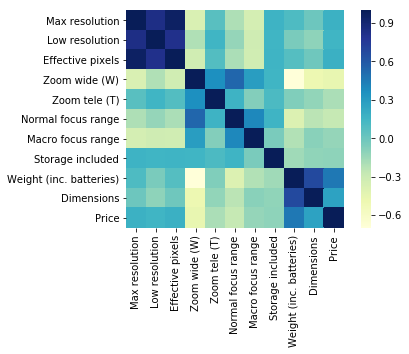

In [111]:
data = data.convert_objects(convert_numeric=True)
data_heatmap = data.drop(['Model', 'Release date'], axis=1).corr()
sns.heatmap(data_heatmap, cmap="YlGnBu", square=True)
plt.show()

## 2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков.

                   Price  Max resolution  Low resolution
Price           1.000000        0.183202        0.154179
Max resolution  0.183202        1.000000        0.838381
Low resolution  0.154179        0.838381        1.000000
                   Price  Max resolution  Low resolution
Price           1.000000        0.101269        0.150699
Max resolution  0.101269        1.000000        0.877851
Low resolution  0.150699        0.877851        1.000000


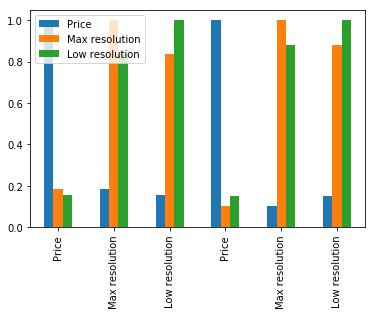

In [112]:
print(data[['Price', 'Max resolution', 'Low resolution']].corr(method='pearson'))
print(data[['Price', 'Max resolution', 'Low resolution']].corr(method='spearman'))
spearPears = pd.concat([data[['Price', 'Max resolution', 'Low resolution']].corr(method='pearson'), 
                       data[['Price', 'Max resolution', 'Low resolution']].corr(method='spearman')])
spearPears.plot.bar()
plt.show()

## 3. Постройте график изменения средней цены на камеры по годам. 

Release date
1994.0    129.000000
1995.0    129.000000
1996.0    554.000000
1997.0    367.181818
1998.0    382.750000
1999.0    349.641509
2000.0    482.442623
2001.0    635.188235
2002.0    552.370787
2003.0    413.316832
2004.0    507.673759
2005.0    448.930070
2006.0    367.934641
2007.0    436.036810
Name: Price, dtype: float64


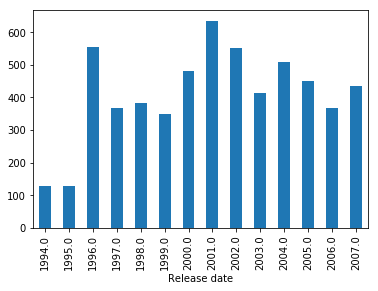

In [113]:
mean_price = data.groupby('Release date')['Price'].mean()
print (mean_price)
mean_price.plot.bar()
plt.show()

## 4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных. 

In [118]:
kort = data['Model'].to_string().split('\n')
s_dict = collections.defaultdict(int)
for k in kort:
    s_dict[re.search('[A-z]+',k).group(0)] +=1
max_value = max(s_dict.values())
f_dict = {k: v for k, v in s_dict.items() if v == max_value}
print("Company & the number of repetitions:")
print(f_dict)

Company & the number of repetitions:
{'Olympus': 122}


## 5. Добавьте в набор данных признак, являющийся произведением двух других признаков. 

In [63]:
data['Result'] = data['Weight (inc. batteries)'] * data['Price']
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Result
0,STRING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agfa ePhoto 1280,1997.0,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,75180.0
2,Agfa ePhoto 1680,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,75180.0
3,Agfa ePhoto CL18,2000.0,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,0.0
4,Agfa ePhoto CL30,1999.0,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,0.0


## 6. Удалите строки с нулевыми значениями в данных. 

In [64]:
data = data[data != 0].dropna()
data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Result
6,Agfa ePhoto CL45,2001.0,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0,48330.0
10,Canon PowerShot A10,2001.0,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,52125.0
11,Canon PowerShot A100,2002.0,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,31275.0
12,Canon PowerShot A20,2001.0,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,52125.0
13,Canon PowerShot A200,2002.0,1600.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,31275.0
14,Canon PowerShot A30,2002.0,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,350.0,110.0,139.0,48650.0
15,Canon PowerShot A300,2003.0,2048.0,1600.0,3.0,33.0,33.0,20.0,5.0,32.0,225.0,111.0,139.0,31275.0
17,Canon PowerShot A40,2002.0,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,350.0,110.0,139.0,48650.0
20,Canon PowerShot A420,2006.0,2272.0,1600.0,4.0,39.0,125.0,47.0,1.0,16.0,200.0,103.0,139.0,27800.0
21,Canon PowerShot A430,2006.0,2272.0,1600.0,4.0,39.0,156.0,47.0,1.0,16.0,210.0,103.0,139.0,29190.0


##  7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [65]:
model = data.groupby('Model')['Price'].max().sort_values()
print ("Minimum: " + model.index[0] + ", Maximum: " + model.index[len(model) - 1])

Minimum: JVC GC-QX5HD, Maximum: Ricoh RDC-i500


## 8. Определите год, в который было выпущено максимально количество новых камер. 

2007.0    130
2006.0    112
2005.0    111
2004.0    100
2003.0     78
2001.0     74
2002.0     70
2000.0     50
1999.0     33
1998.0     15
Name: Release date, dtype: int64


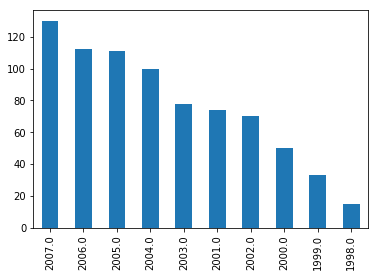

In [66]:
maxCameraRel = data['Release date'].sort_values().value_counts()
print(maxCameraRel)
maxCameraRel.plot.bar()
plt.show()